# Visualization

#### Importing packages 

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

#### Loading pickled dataframes  

In [2]:
station_average_highest = pd.read_pickle('station_average_highest.pickle') #2021 data 
day_of_week_avg = pd.read_pickle('day_of_week_avg.pickle') #2021 data 
highest_stations = pd.read_pickle('highest_stations.pickle') #2021 data 
highest_stations_time_avg = pd.read_pickle('highest_stations_time_avg.pickle') #2021 data

station_average_highest2 = pd.read_pickle('station_average_highest2.pickle') #2019 data
day_of_week_avg2 = pd.read_pickle('day_of_week_avg2.pickle') #2019 data 
highest_stations_time_avg2 = pd.read_pickle('highest_stations_time_avg2.pickle') #2021 data

## 1. Highest Traffic Stations

### 1.1 Average Daily Foot Traffic for the Highest Traffic Stations 2021

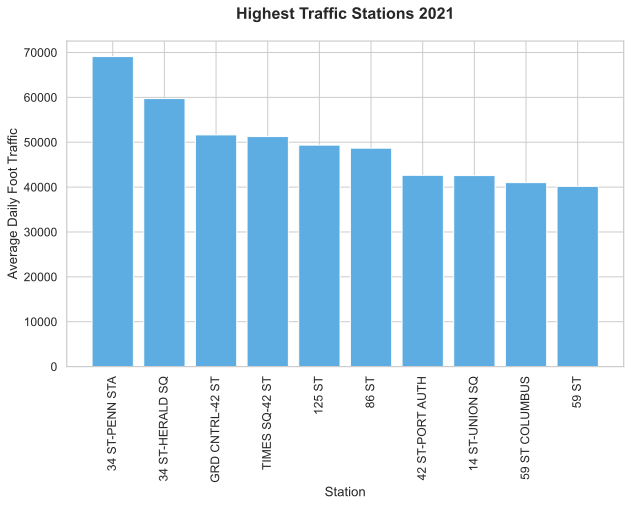

In [3]:
plt.figure(figsize=(10,6))
plt.bar(station_average_highest["STATION"], station_average_highest["DAILY_ENTRIES_EXITS"], color='#5DADE2')
plt.xlabel("Station")
plt.ylabel("Average Daily Foot Traffic")
ticks_y = np.linspace(0, 70000, 8)
plt.yticks(ticks_y)
plt.xticks(rotation=90)
plt.title("Highest Traffic Stations 2021", weight='bold', fontsize=16, y=1.05)
plt.savefig('highest_traffic_stations.svg', bbox_inches='tight')
plt.show();

### 1.2 Comparing the Highest Traffic Stations in 2019 and 2021

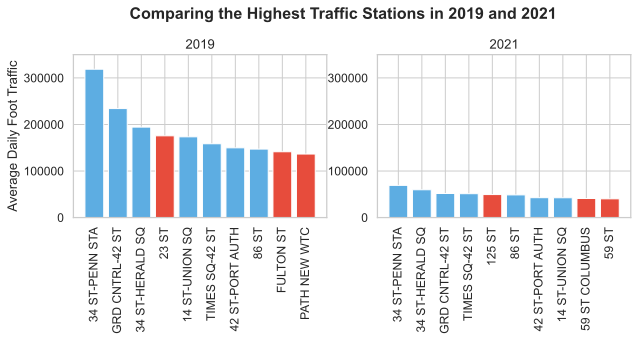

In [4]:
plt.figure(figsize=[10,3])
plt.suptitle('Comparing the Highest Traffic Stations in 2019 and 2021',fontsize = 16, weight='bold', y=1.1)


plt.subplot(1,2,1) # (number of rows, number of columns, number of plot)
plt.bar(station_average_highest2["STATION"], station_average_highest2["DAILY_ENTRIES_EXITS"], color=['#5DADE2','#5DADE2','#5DADE2','#E74C3C','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#E74C3C','#E74C3C'])
plt.title('2019')
plt.ylabel("Average Daily Foot Traffic")
plt.xticks(rotation=90)
axes = plt.gca()
axes.set_ylim([0,350000])

plt.subplot(1,2,2)
plt.bar(station_average_highest["STATION"], station_average_highest["DAILY_ENTRIES_EXITS"], color=['#5DADE2','#5DADE2','#5DADE2','#5DADE2','#E74C3C','#5DADE2','#5DADE2','#5DADE2','#E74C3C','#E74C3C'])
plt.title('2021')
plt.xticks(rotation=90)
axes = plt.gca()
axes.set_ylim([0,350000])
plt.savefig('comparison_highest_traffic_stations.svg', bbox_inches='tight')
plt.show();

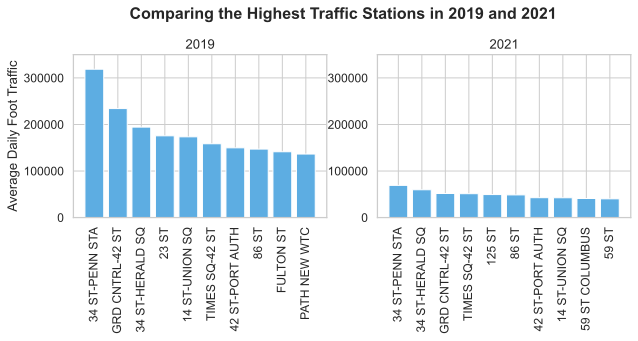

In [5]:
plt.figure(figsize=[10,3])
plt.suptitle('Comparing the Highest Traffic Stations in 2019 and 2021',fontsize = 16, weight='bold', y=1.1)


plt.subplot(1,2,1) # (number of rows, number of columns, number of plot)
plt.bar(station_average_highest2["STATION"], station_average_highest2["DAILY_ENTRIES_EXITS"], color=['#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2'])
plt.title('2019')
plt.ylabel("Average Daily Foot Traffic")
plt.xticks(rotation=90)
axes = plt.gca()
axes.set_ylim([0,350000])

plt.subplot(1,2,2)
plt.bar(station_average_highest["STATION"], station_average_highest["DAILY_ENTRIES_EXITS"], color=['#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2','#5DADE2'])
plt.title('2021')
plt.xticks(rotation=90)
axes = plt.gca()
axes.set_ylim([0,350000])
plt.savefig('comparison_highest_traffic_stations2.svg', bbox_inches='tight')
plt.show();

 ## 2. Days of the week with the highest traffic*
 * for the highest traffic stations

 ### 2.1.1 Day of the week with the highest traffic for 2021 - barplot 

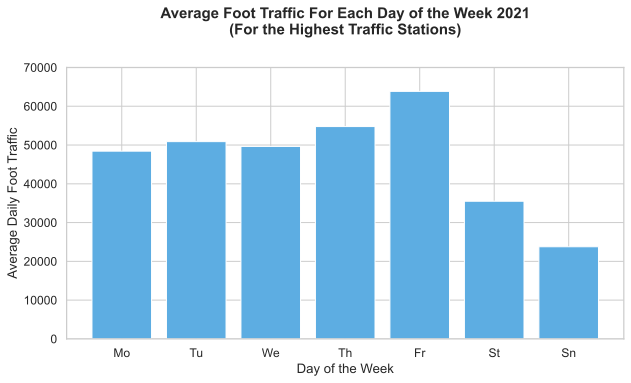

In [6]:
plt.figure(figsize=(10,5))
plt.bar(day_of_week_avg['DAY_OF_WEEK_NUM'], day_of_week_avg['DAILY_ENTRIES_EXITS'], color='#5DADE2')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Foot Traffic')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
axes = plt.gca()
axes.set_ylim([0,70000])
plt.title('Average Foot Traffic For Each Day of the Week 2021\n(For the Highest Traffic Stations)', weight='bold', fontsize=15, y=1.1)
plt.savefig('traffic_days.svg', bbox_inches='tight')
plt.show();

### 2.1.2 Day of the week with the highest traffic for 2021 - scatterplot 

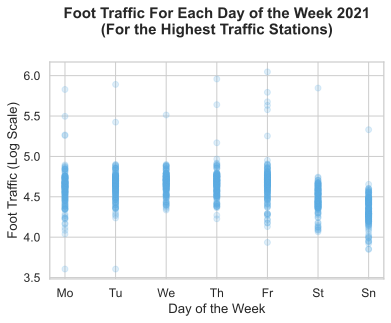

In [7]:
new_x = highest_stations['DAY_OF_WEEK_NUM']
new_y = highest_stations['DAILY_ENTRIES_EXITS']
plt.xlabel('Day of the Week')
plt.ylabel('Foot Traffic (Log Scale)')
plt.title('Foot Traffic For Each Day of the Week 2021\n(For the Highest Traffic Stations)', weight='bold', fontsize=15, y=1.1);
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.scatter(new_x,np.log10(new_y), alpha = 0.2, color='#5DADE2')
plt.savefig('traffic_days2.svg', bbox_inches='tight')
plt.show();

### 2.2.1 Comparing the Highest Traffic Days of the Week in 2019 and 2021

First combining dataframes from 2019 and 2021

In [8]:
day_of_week_avg2.rename(columns = {'DAILY_ENTRIES_EXITS' : 'DAILY_ENTRIES_EXITS2'}, inplace = True)

In [9]:
day_of_week_merged = pd.merge(day_of_week_avg, day_of_week_avg2, on='DAY_OF_WEEK_NUM', how='outer')
day_of_week_merged

,DAY_OF_WEEK_NUM,DAILY_ENTRIES_EXITS,DAILY_ENTRIES_EXITS2
0,4,63840.059172,202868.272189
1,3,54758.159763,207227.994083
2,1,50875.526627,183521.751479
3,2,49642.360947,207435.852071
4,0,48425.147929,170469.118343
5,5,35500.211538,101690.346154
6,6,23767.171598,88892.786982


In [10]:
#sort dataframe by day in place
day_of_week_merged.sort_values("DAY_OF_WEEK_NUM", ascending = True, inplace = True)
#resetting index
day_of_week_merged = day_of_week_merged.reset_index(drop=True)

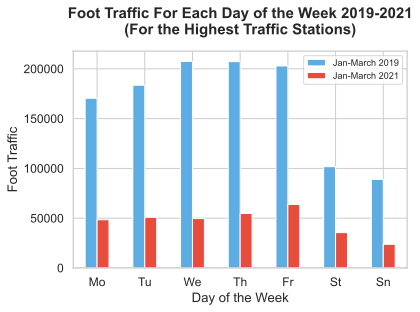

In [11]:
times = day_of_week_merged['DAY_OF_WEEK_NUM']
Series2 = day_of_week_merged['DAILY_ENTRIES_EXITS2']
Series1 = day_of_week_merged['DAILY_ENTRIES_EXITS']

df = pd.DataFrame({'Jan-March 2019':Series2, 'Jan-March 2021':Series1})
ax = df.plot.bar(color=['#5DADE2','#E74C3C'], rot=0)
plt.title('Foot Traffic For Each Day of the Week 2019-2021\n(For the Highest Traffic Stations)', weight='bold', fontsize=15, y=1.05)
plt.legend(fontsize='x-small')
ax.set_xlabel('Day of the Week')
ax.set_xticks(day_of_week_merged['DAY_OF_WEEK_NUM'].sort_values())
ax.set_xticklabels(['Mo','Tu','We','Th','Fr','St','Sn'])
ax.set_ylabel('Foot Traffic')
plt.savefig('comparison_traffic_days2.svg', bbox_inches='tight')
plt.show();

### 2.2.2 Comparing the Highest Traffic Days of the Week in 2019 and 2021 - percent decrease

In [12]:
day_of_week_merged["PERCENT_DECREASE"] = ((day_of_week_merged['DAILY_ENTRIES_EXITS2'] - day_of_week_merged['DAILY_ENTRIES_EXITS'])/(day_of_week_merged['DAILY_ENTRIES_EXITS2']))*100
day_of_week_merged

,DAY_OF_WEEK_NUM,DAILY_ENTRIES_EXITS,DAILY_ENTRIES_EXITS2,PERCENT_DECREASE
0,0,48425.147929,170469.118343,71.593009
1,1,50875.526627,183521.751479,72.278203
2,2,49642.360947,207435.852071,76.068572
3,3,54758.159763,207227.994083,73.575887
4,4,63840.059172,202868.272189,68.531275
5,5,35500.211538,101690.346154,65.089890
6,6,23767.171598,88892.786982,73.263104


In [13]:
day_of_week_merged["CHANGE_ENTRIES_EXITS"] = day_of_week_merged['DAILY_ENTRIES_EXITS2'] - day_of_week_merged['DAILY_ENTRIES_EXITS']
day_of_week_merged

,DAY_OF_WEEK_NUM,DAILY_ENTRIES_EXITS,DAILY_ENTRIES_EXITS2,PERCENT_DECREASE,CHANGE_ENTRIES_EXITS
0,0,48425.147929,170469.118343,71.593009,122043.970414
1,1,50875.526627,183521.751479,72.278203,132646.224852
2,2,49642.360947,207435.852071,76.068572,157793.491124
3,3,54758.159763,207227.994083,73.575887,152469.834320
4,4,63840.059172,202868.272189,68.531275,139028.213018
5,5,35500.211538,101690.346154,65.089890,66190.134615
6,6,23767.171598,88892.786982,73.263104,65125.615385


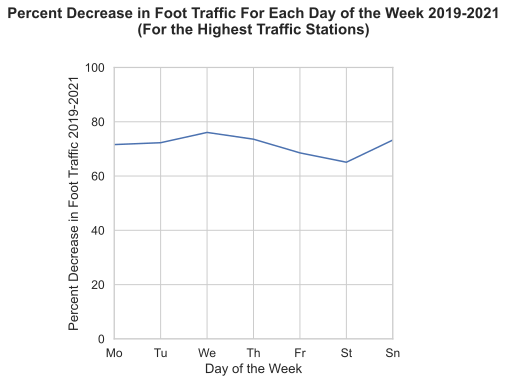

In [14]:
plt.figure(figsize=(5,5))
plt.plot(day_of_week_merged['DAY_OF_WEEK_NUM'], day_of_week_merged["PERCENT_DECREASE"])
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.ylim(ymin=0, ymax=100)
plt.xlim(xmin=0, xmax=6)
plt.xlabel('Day of the Week')
plt.ylabel('Percent Decrease in Foot Traffic 2019-2021')
plt.title('Percent Decrease in Foot Traffic For Each Day of the Week 2019-2021\n(For the Highest Traffic Stations)', weight='bold', fontsize=15, y=1.1);

## 3. Highest Traffic Hours of the Day

### 3.1 Highest Traffic Hours of the Day for 2021

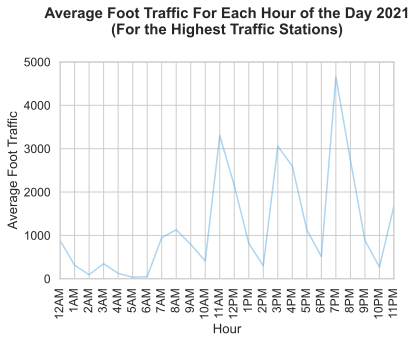

In [15]:
pd.plotting.register_matplotlib_converters()
new_x = highest_stations_time_avg['HOUR']
new_y = highest_stations_time_avg['TIME_ENTRIES_EXITS']
plt.xlabel('Hour')
plt.ylim(ymin=0, ymax=5000)
plt.xlim(xmin=0, xmax=23)
plt.xticks(np.arange(0, 24, step=1), labels = ['12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM'], rotation = 90)
#plt.xticks(np.arange(12),['12AM','2AM','4AM','6AM','8AM','10AM','12PM','2PM','4PM','6PM','8PM','10PM'])
plt.ylabel('Average Foot Traffic')
plt.title('Average Foot Traffic For Each Hour of the Day 2021\n(For the Highest Traffic Stations)', weight='bold', fontsize=15, y=1.1)
plt.plot(new_x, new_y, alpha = 0.5, color='#5DADE2')
plt.savefig('traffic_hours.svg', bbox_inches='tight')
plt.show();

### 3.2 Comparing Foot Traffic for the Hours of the Day in 2019 and 2021

First combining the data from 2019 and 2021

In [16]:
highest_stations_time_avg2.rename(columns = {'TIME_ENTRIES_EXITS' : 'TIME_ENTRIES_EXITS2'}, inplace = True)

In [17]:
time_merged = pd.merge(highest_stations_time_avg, highest_stations_time_avg2, on='HOUR', how='outer')
time_merged.head()

,HOUR,TIME_ENTRIES_EXITS,TIME_ENTRIES_EXITS2
0,0,885.414449,4242.737304
1,1,312.759483,1607.293277
2,2,93.310085,366.341255
3,3,347.903471,1620.708926
4,4,126.543242,649.627108


In [18]:
time_merged.sort_values("HOUR", ascending = True, inplace = True)
time_merged = time_merged.reset_index(drop=True)

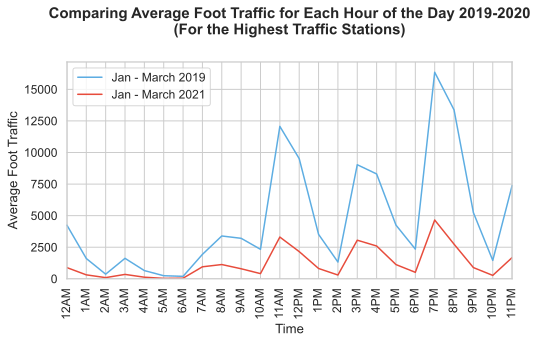

In [19]:
plt.figure(figsize=(8,4))
plt.plot(time_merged['HOUR'], time_merged['TIME_ENTRIES_EXITS2'], color='#5DADE2')
plt.plot(time_merged['HOUR'], time_merged['TIME_ENTRIES_EXITS'], color='#E74C3C')
plt.xlabel('Time')
plt.xlim(xmin=0, xmax=23)
plt.xticks(np.arange(0, 24, step=1), labels = ['12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM','9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM','10PM','11PM'], rotation = 90)
#plt.xticks(np.arange(12),['12AM','2AM','4AM','6AM','8AM','10AM','12PM','2PM','4PM','6PM','8PM','10PM'])
plt.ylabel('Average Foot Traffic')
plt.ylim(ymin=0)
plt.title('Comparing Average Foot Traffic for Each Hour of the Day 2019-2020\n(For the Highest Traffic Stations)', weight='bold', fontsize=15, y=1.1)
plt.legend(['Jan - March 2019','Jan - March 2021'],loc = 0)
plt.savefig('traffic_hours2.svg', bbox_inches='tight')
plt.show();